# Importing Modules

In [1]:
# Importing the required libraries here
import numpy as np
import pandas as pd
import plotly_express as px

# missing datapoints visualisation
import missingno

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Cleansing

In this part of the analysis I will look for duplicate rows, empty rows and anything that I may need to remove from the dataframe before we beginning working with the dataset.

In [2]:
# loading data into a dataframe
factors_df = pd.read_excel('Factors contributing to the success and the failures of TUT students.xlsx')

factors_df.head(3) # first three rows

,ID,Start time,Completion time,Email,Name,Last modified time,Select faculty,Which year did you register:,How were your studies funded?,"If you selected Nsfas, how was the application process?",...,What was the biggest challenge you encountered with the lecturers?,Kindly rate the lectures at your faculty:,Provide a reason for your rating:,Are you currently employed?,"If yes, is it on the field you studied for?",How long did it it take for you to find employment?,Was it easy applying what you were taught during the duration of your studies at the work place?,What were your career aspirations?,How can you rate TUT overall as an Institution:,What can TUT do to improve:
0,14,2024-09-23 14:23:53,2024-09-23 14:34:54,anonymous,NaN,NaN,Information and Communication Technology,2010,Self funded,Challenging,...,Canceling class,5,Lesson delivery,Yes,No,Less than 1 year,Not working in the field,Employment in the field of study,4,Improve quality of education
1,15,2024-09-23 20:54:23,2024-09-23 20:58:48,anonymous,NaN,NaN,Information and Communication Technology,2010,Self funded,NaN,...,All of the above,2,Feedback,No,NaN,Other,Not working in the field,Employment in the field of study,4,Improved mental health facilities
2,16,2024-09-23 20:59:55,2024-09-23 21:02:52,anonymous,NaN,NaN,Information and Communication Technology,2010,Self funded,NaN,...,Canceling class,5,They were excellent,No,No,Less than 1 year,Not working in the field,Innovation,4,Improved mental health facilities


In [3]:
factors_df.tail(2) # last 2 rows

,ID,Start time,Completion time,Email,Name,Last modified time,Select faculty,Which year did you register:,How were your studies funded?,"If you selected Nsfas, how was the application process?",...,What was the biggest challenge you encountered with the lecturers?,Kindly rate the lectures at your faculty:,Provide a reason for your rating:,Are you currently employed?,"If yes, is it on the field you studied for?",How long did it it take for you to find employment?,Was it easy applying what you were taught during the duration of your studies at the work place?,What were your career aspirations?,How can you rate TUT overall as an Institution:,What can TUT do to improve:
19,33,2024-09-29 13:45:27,2024-09-29 13:49:28,anonymous,NaN,NaN,The arts,2001,Self funded,NaN,...,Other,4,They were excellent,Yes,Yes,Less than 3 years,Yes,Other,5,More assistance with funding
20,34,2024-09-29 14:06:46,2024-09-29 14:10:32,anonymous,NaN,NaN,Management Sciences,2012,All of the above,Somewhat difficult,...,Other,5,They were excellent,Yes,Yes,Less than 2 years,No,Innovation,5,Improved mental health facilities


In [4]:
# dimensions of the dataframe
factors_df.shape

(21, 29)

In [5]:
# removing duplicate rows
factors_df.drop_duplicates(keep='first')

factors_df.shape

(21, 29)

 There are no empty rows at the end that need to be removed. There are also no duplicate rows that could be found. The dataset contains columns that are not necessary for the analysis of this project and therefore will be removed.

In [6]:
# creating a list of the columns to remove
columns = ['ID','Start time','Completion time','Email','Name','Last modified time']

factors_df = factors_df.drop(columns, axis = 1) #dropping colums

factors_df.info() #reviewing the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 23 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Select  faculty                                                                                   21 non-null     object 
 1   Which year did you register:                                                                      21 non-null     int64  
 2   How were your studies funded?                                                                     21 non-null     object 
 3   If you selected Nsfas, how was the application process?                                           9 non-null      object 
 4   What can be improved to make the NSFAS application process easier:                                9 non-null      object 
 5   Kin

Now we can see that the columns have been removed from the dataframe, but there is still another issue of the long names for the remaining columns. For example 'Where were you staying during the period of your studies?' which could be reduced to 'Residence Type'. Below is a list of the columns in the dataframe and a list of the new column names that will be used

In [7]:
# existing column names
column_names = factors_df.columns

column_names

Index(['Select  faculty', 'Which year did you register:',
       'How were your studies funded?',
       'If you selected Nsfas, how was the application process?',
       'What can be improved to make the NSFAS application process easier:',
       'Kindly rate the Nsfas application process:',
       'Where were you staying during the period of your studies?',
       'If you were staying off campus, what was the reason?',
       'Did you complete your qualification?',
       'Did you complete your qualification in record time?',
       'If you selected No, what was the reason you could not complete?',
       'What were your major challenges during the duration of your studies?',
       'Was there any support outside of lectures?',
       'What was the biggest challenge you encountered with the lecturers?',
       'Kindly rate the lectures at your faculty:',
       'Provide a reason for your rating:', 'Are you currently employed?',
       'If yes, is it on the field you studied for?',
  

In [8]:
# proposed new column names list
new_columns = [
    'Faculty','Registration Year','Funding','NSFAS Application Process','Recommendations On NSFAS Process','NSFAS Process Rating',
    'Residence','Reason for Off Campus Stay','Graduation Status','Completion Period','Reason for No Graduation','Major Challenges',
    'Support','Challenges With Lecturers','Lecture Ratings','Reason For Rating','Employment Status','Employed In Field Of Study',
    'Period Spent Looking For Work','Was It Easy Applying Undergrad Knowledge',
    'Career Aspirations','TUT Rating','Recommendations'
]

# renaming the columns in the dataframe
factors_df = factors_df.set_axis(new_columns, axis = 1)

In [9]:
factors_df.info() # viewing colums information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Faculty                                   21 non-null     object 
 1   Registration Year                         21 non-null     int64  
 2   Funding                                   21 non-null     object 
 3   NSFAS Application Process                 9 non-null      object 
 4   Recommendations On NSFAS Process          9 non-null      object 
 5   NSFAS Process Rating                      9 non-null      float64
 6   Residence                                 21 non-null     object 
 7   Reason for Off Campus Stay                10 non-null     object 
 8   Graduation Status                         21 non-null     object 
 9   Completion Period                         21 non-null     object 
 10  Reason for No Graduation                

From the information above it can be seen that the columns are much better. Now that the data cleansing is done, the dataframe has no duplicate rows, but it does have missing datapoints in multiple columns. The next step is to analyse this missing data and how to handle them.


# Handling Missing Data

First thing to do is to locate the missing data in the dataframe, a visualisation of the dataframe will make it is easier to get a quick sense of the spread of the missing data.

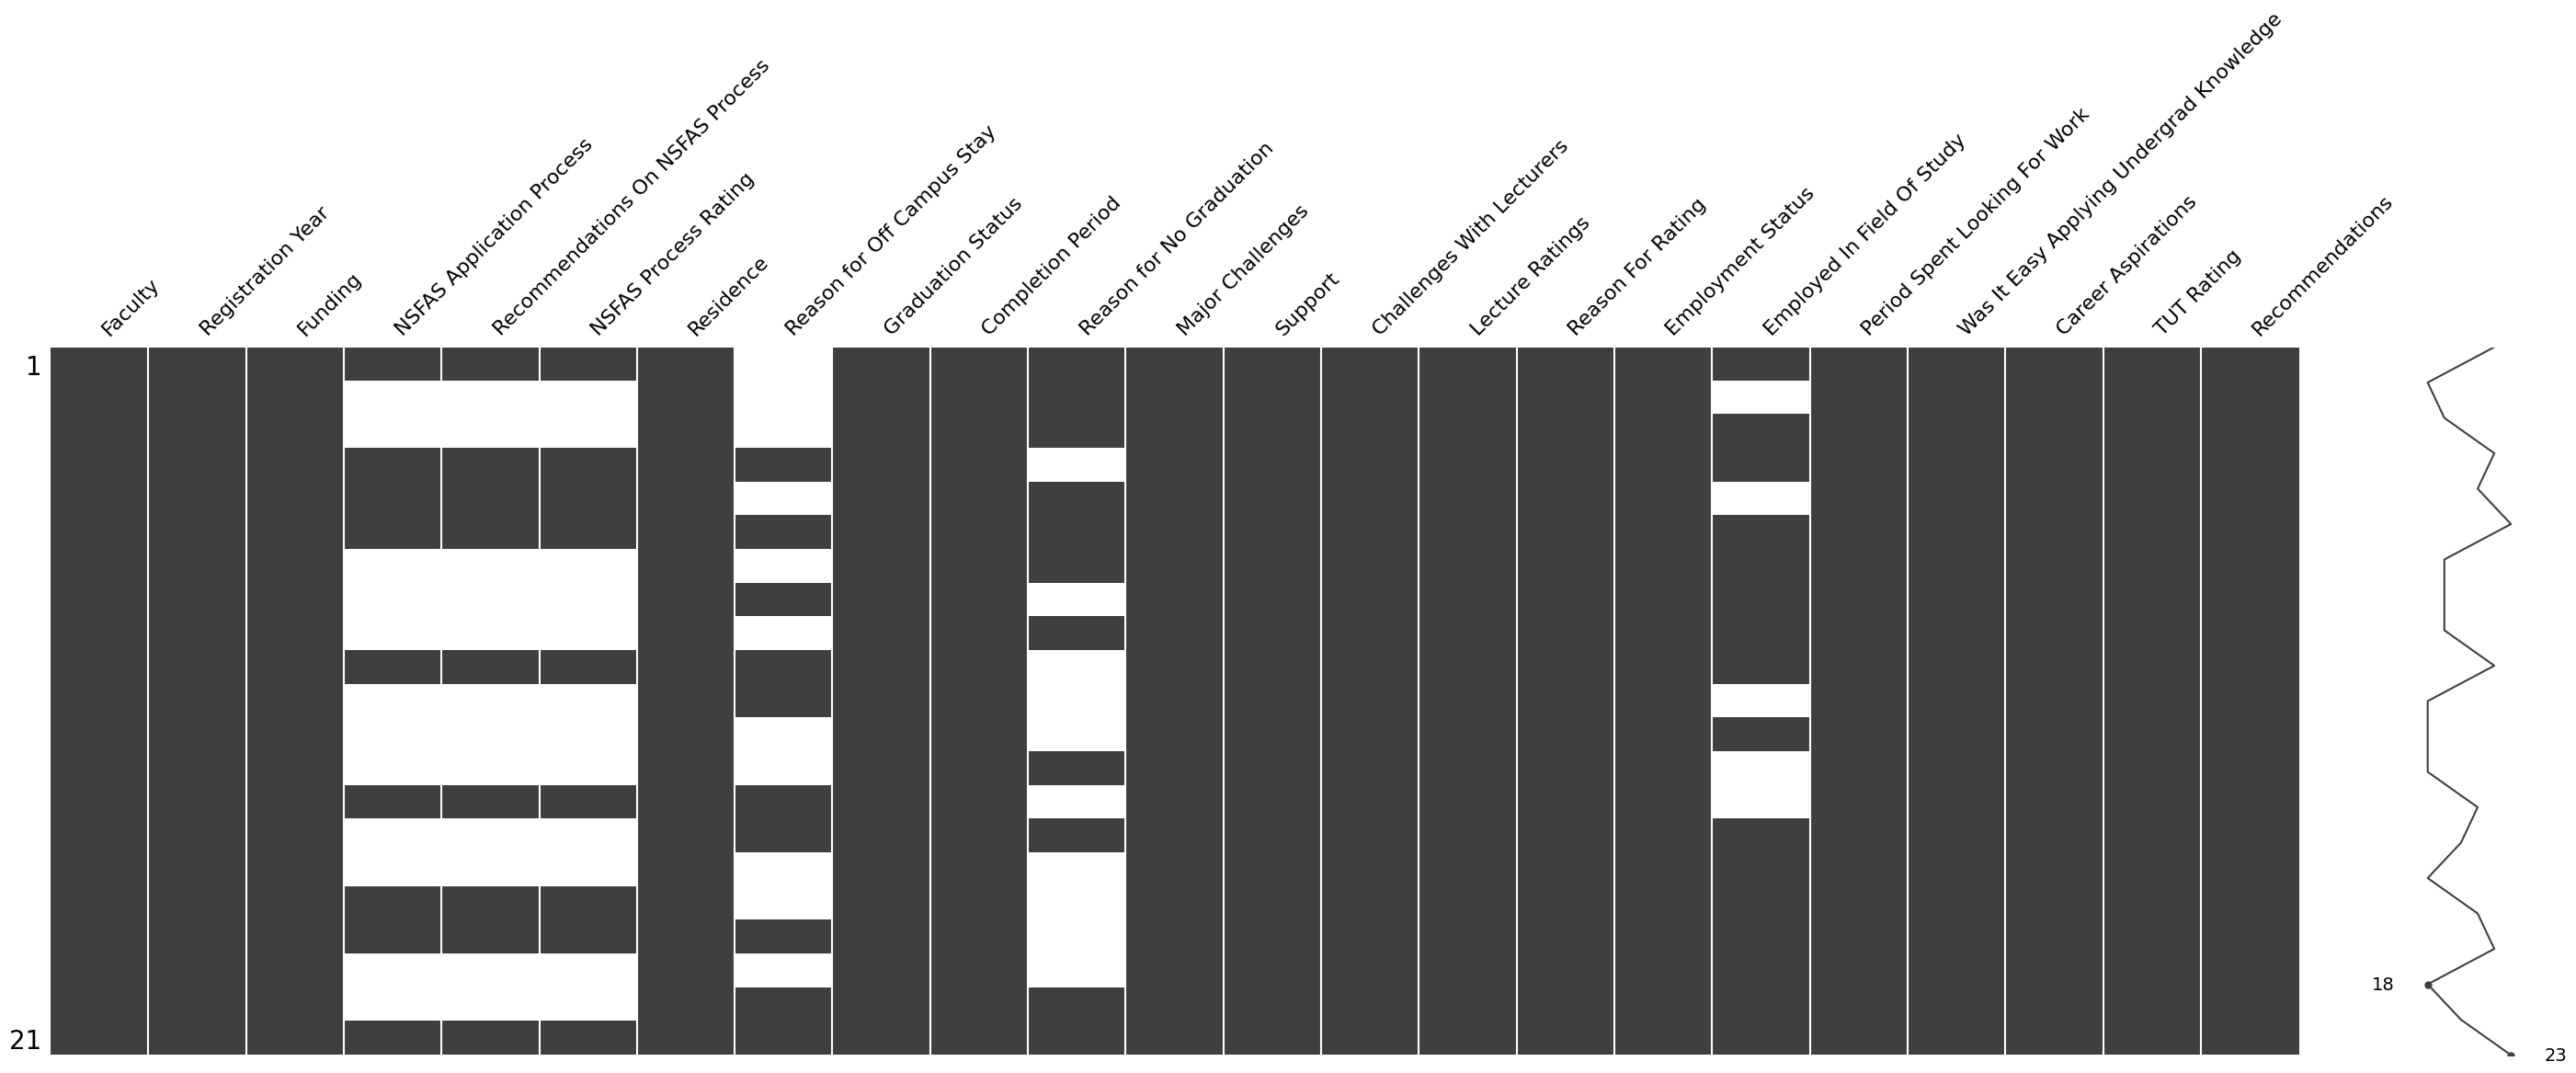

In [10]:
# Plot graphic of missing values
missingno.matrix(factors_df, figsize = (35,10));

From the plot above we can see that there are missing data points in the dataframe, now the next step is to check how much percent of the overall data the missing data makes.

In [11]:
# getting the number of missing data points per column
missing_datapoints = factors_df.isnull().sum()

# number of missing data points in the columns
missing_datapoints[missing_datapoints != 0]

NSFAS Application Process           12
Recommendations On NSFAS Process    12
NSFAS Process Rating                12
Reason for Off Campus Stay          11
Reason for No Graduation            10
Employed In Field Of Study           5
dtype: int64

In [12]:
# getting the total number of cells 
total = np.product(factors_df.shape)

# gettng total number of missing data points
missing_data_total = missing_datapoints.sum()

# checking the percentage of missing data
percent = f"{round((missing_data_total/total)*100,2)}%"

print("Percentage of missing data points is",percent)

Percentage of missing data points is 12.84%


Depending on the percentage of the missing data, you can decide whether you want drop the rows with the missing datapoints, risking loss of information or you can choose a method of imputation to replace the missing data. In this case we won't be dropping the rows with the missing data, it is understood why the data is missing. It is because some questions were dependent on answers provided from previous questions.                                                                                                                                                                                                                                                                                                                                                                       Therefore each column will be studied on how an imputation can be performed.

The first 3 columns that have missing data are all based on the question of funding and if a student was funded by NSFAS they are asked to answer follow questions. Only students funded by NSFAS could respond and thus the missing data for those who were not funded.

The 'NSFAS Application Process' and 'Recommendations On NSFAS Process' columns can be imputated with Not applicable since they ask question based on NSFAS funding. 

The 'NSFAS Process Rating' column can be imputed with a value of zero as this would not affect the total in the calculation for the average rating. But to ensure the rating is calculated correctly, the number of items will excluded the rows with a zero rating.

In [13]:
#imputation on the first 3 columns with missing values

columns = ['NSFAS Application Process','Recommendations On NSFAS Process']

factors_df[columns] = factors_df[columns].fillna('Not Applicable')

factors_df['NSFAS Process Rating'] = factors_df['NSFAS Process Rating'].fillna(0)

The next step is to perform imputation on the remaing columns that have missing data. For columns 'Reason for No Graduation' and 'Employed In Field Of Study' will be imputed with no answer for missing data. 

Column 'Reason for Off Campus Stay' will be imputed with Not Applicable

In [14]:
# imputing missing data on the remaining columns in the dataframe

columns = ['Reason for No Graduation', 'Employed In Field Of Study']

factors_df[columns] = factors_df[columns].fillna('No Answer')

factors_df['Reason for Off Campus Stay'] = factors_df['Reason for Off Campus Stay'].fillna('Not Applicable')

Now that we have taken care of all columns that can have missing data, it is time to use our visualisation to see if there is any missing data that we may have missed.

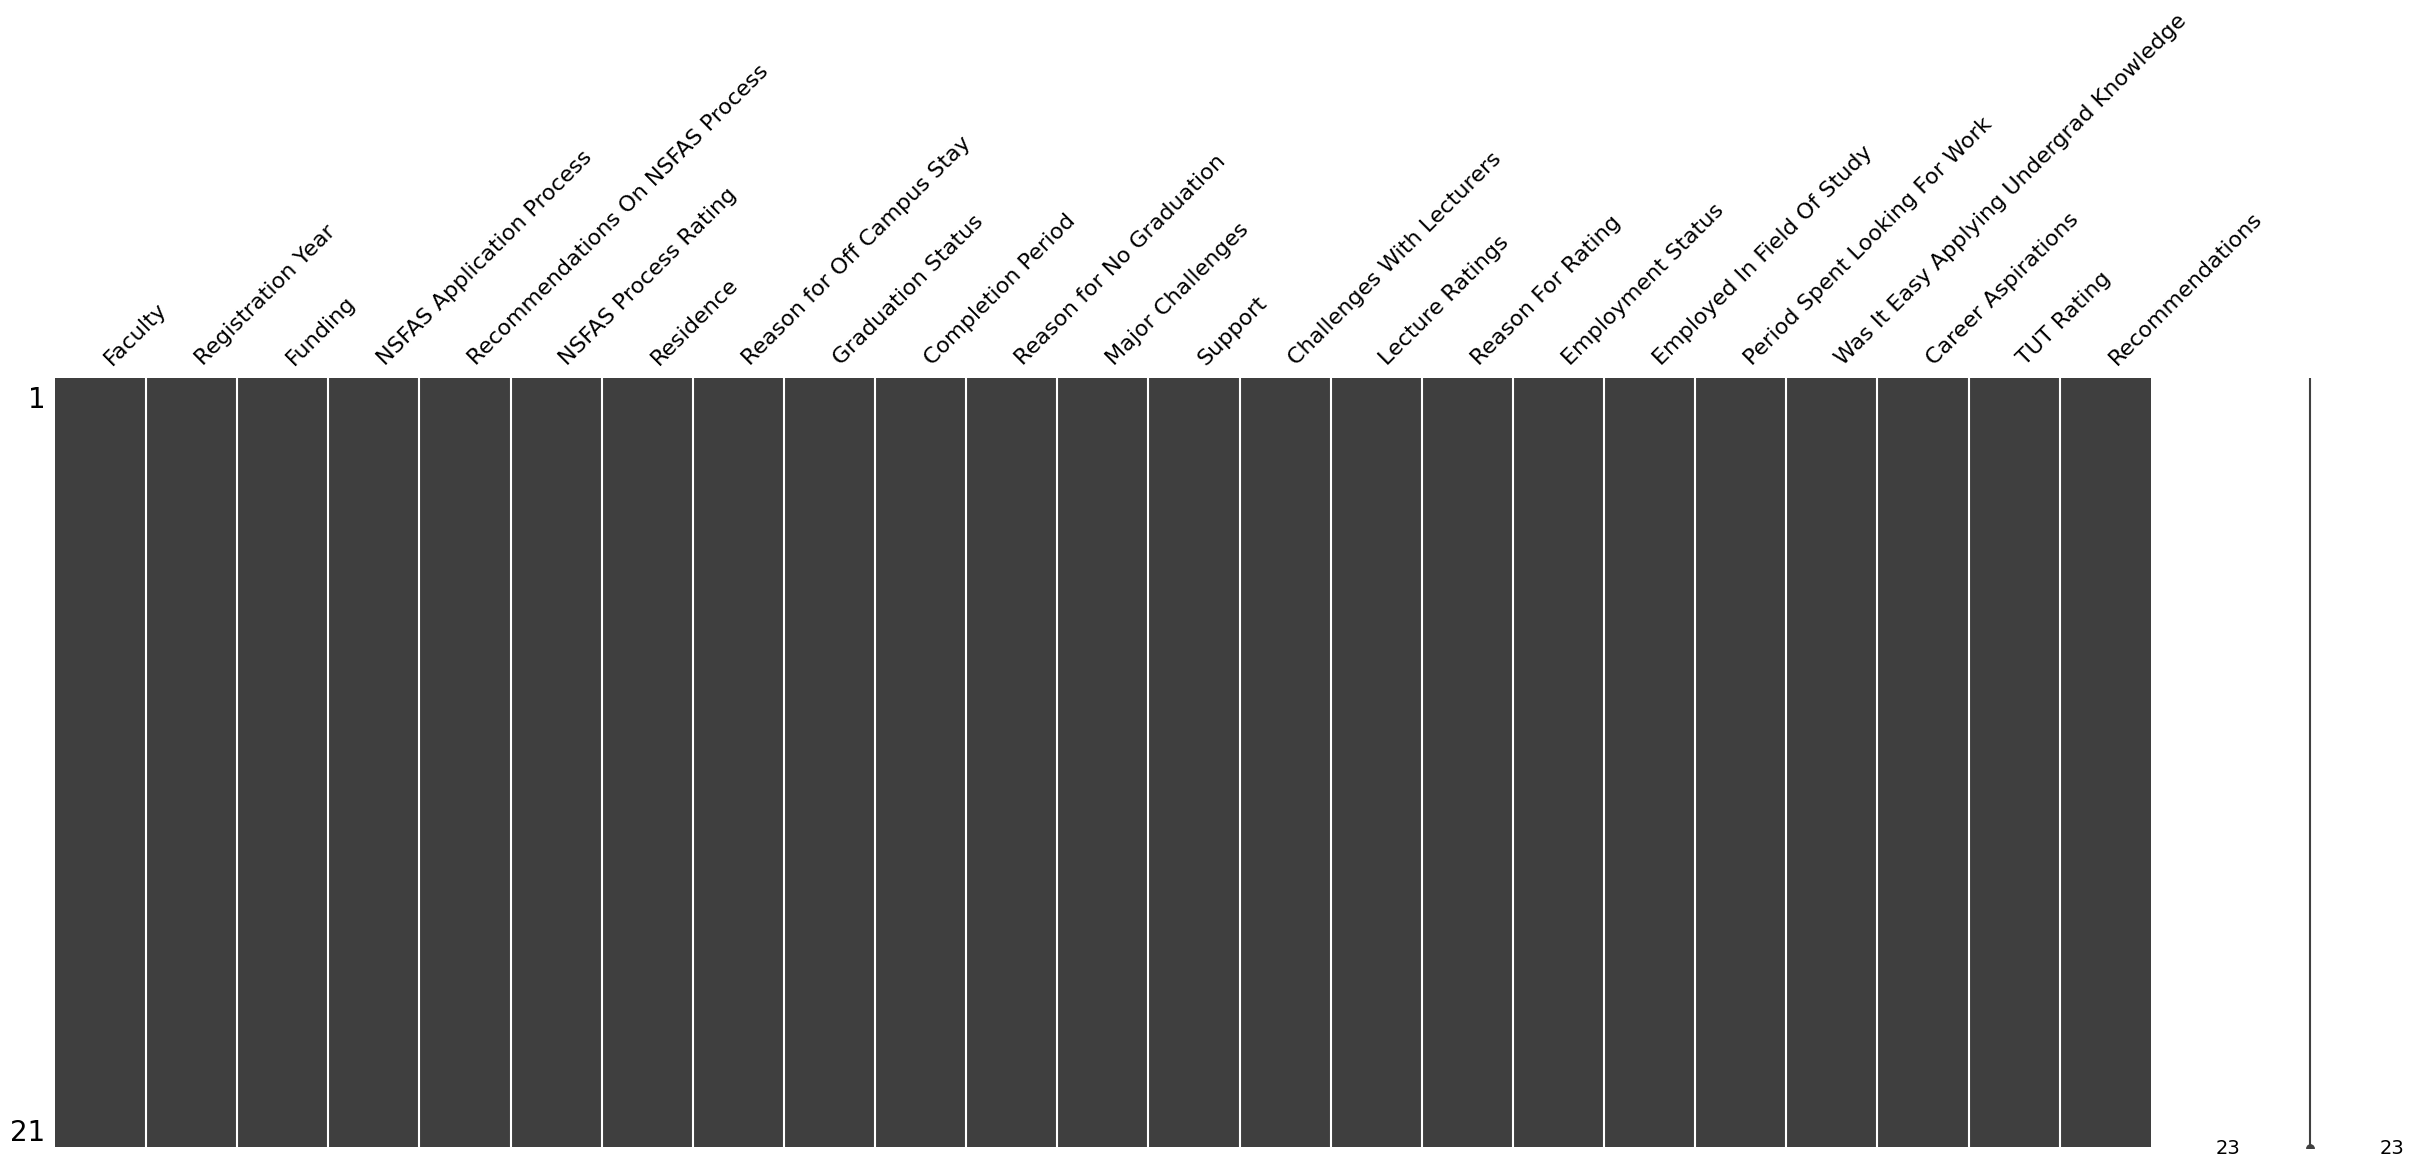

In [15]:
# Plot graphic of missing values
missingno.matrix(factors_df, figsize = (30,10));

In [16]:
# getting the number of missing data points per column
missing_datapoints = factors_df.isnull().sum()

# number of missing data points in the columns
missing_datapoints[missing_datapoints != 0]

Series([], dtype: int64)

In [17]:
# getting the total number of cells 
total = np.product(factors_df.shape)

# gettng total number of missing data points
missing_data_total = missing_datapoints.sum()

# checking the percentage of missing data
percent = f"{round((missing_data_total/total)*100,2)}%"

print("Percentage of missing data points is",percent)

Percentage of missing data points is 0.0%


Now that the missing datapoints have been handled, we can move on to the next step which is the dashboard. Below will be the preparation of the visuals and controls required for the dashboard.